In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 정의
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8961 - loss: 0.3382
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9844 - loss: 0.0515
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9893 - loss: 0.0327
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9915 - loss: 0.0239
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9943 - loss: 0.0184


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=mnist_tensorflow_model.

In [3]:
# 모델 저장
model.save('mnist_tensorflow_model.h5')

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# CNN 모델 정의
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(7*7*64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(-1, 7*7*64)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 데이터 로드
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# 모델, 손실 함수, 옵티마이저
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습
for epoch in range(1):
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 학습된 모델 저장
torch.save(model.state_dict(), 'mnist_model.pth')

ValueError: Expected input batch_size (1024) to match target batch_size (64).

#### PyTorch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

In [3]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('current cuda device is', device)

current cuda device is cpu


In [4]:
batch_size = 50
learning_rate = 0.0001
epoch_num = 15

In [5]:
train_data = datasets.MNIST(root = './data',
                            train = True,
                            download= True,
                            transform = transforms.ToTensor())
test_data = datasets.MNIST(root = './data',
                           train = False,
                           transform = transforms.ToTensor())

print('number of traing data:',len(train_data))
print('number of test data:', len(test_data))

number of traing data: 60000
number of test data: 10000


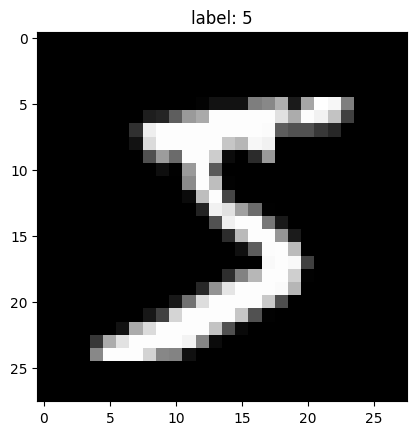

In [6]:
image, label = train_data[0]

plt.imshow(image.squeeze().numpy(), cmap ='gray')
plt.title('label: %s' % label)
plt.show()

In [7]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                            batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                          batch_size = batch_size, shuffle = True)

first_batch = train_loader.__iter__().__next__()

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,1,padding='same')
        self.conv2 = nn.Conv2d(32,64,3,1,padding='same')
        self.dropout = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(3136,1000) # 7*7*64=3436
        self.fc2 = nn.Linear(1000,10)
    
    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.dropout(x)
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [9]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterison = nn.CrossEntropyLoss()

In [10]:
model.train()
i = 1
for epoch in range(epoch_num):
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterison(output, target)
        loss.backward()
        optimizer.step()
        if i % 1000 == 0:
            print('train step: {}\t loss: {:.3f}'.format(i, loss.item()))
            
        i += 1

train step: 1000	 loss: 0.172
train step: 2000	 loss: 0.130
train step: 3000	 loss: 0.069
train step: 4000	 loss: 0.047
train step: 5000	 loss: 0.023
train step: 6000	 loss: 0.006
train step: 7000	 loss: 0.004
train step: 8000	 loss: 0.024
train step: 9000	 loss: 0.005
train step: 10000	 loss: 0.008
train step: 11000	 loss: 0.017
train step: 12000	 loss: 0.014
train step: 13000	 loss: 0.001
train step: 14000	 loss: 0.008
train step: 15000	 loss: 0.002
train step: 16000	 loss: 0.001
train step: 17000	 loss: 0.004
train step: 18000	 loss: 0.002


#### CPU에서 11분 소요!

In [14]:
torch.save(model.state_dict(), './mnist_model.pt')